### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB

### train_data which as text and id

In [2]:
d1=pd.read_csv('V:/Vaishakh/Akaike/train_data.csv')

### train_label which as id and label

In [3]:
d2=pd.read_csv('V:/Vaishakh/Akaike/train_label.csv')

### Information about both of the training datasets

In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41569 entries, 0 to 41568
Data columns (total 2 columns):
text    41569 non-null object
id      41569 non-null int64
dtypes: int64(1), object(1)
memory usage: 649.6+ KB


In [5]:
d1.head()

,text,id
0,"Keep your gloves, hats, coats and jackets toge...",122885
1,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958
2,The Bosch 18-Volt lithium-ion line of Cordless...,146065
3,Restore your Porter-Cable sander or polisher t...,165138
4,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565


In [6]:
d1.shape

(41569, 2)

In [7]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75170 entries, 0 to 75169
Data columns (total 2 columns):
id       75170 non-null int64
label    75170 non-null object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
d2.head()

,id,label
0,100003,Shape
1,100004,Voltage (volts)
2,100004,Wattage (watts)
3,100006,Wattage (watts)
4,100007,ENERGY STAR Certified


In [9]:
d2.shape

(75170, 2)

#### We can see that single id has different label and thats why the shape of the data is higher than text

In [10]:
dt=pd.read_csv('V:/Vaishakh/Akaike/test_data.csv')

In [11]:
dt.head()

,text,id
0,These machine screw nuts are designed to be us...,114689
1,The M18 FUEL Drill/Driver is the Most Powerful...,183172
2,Steel City 2-Gang 30 cu. in. Square Electrical...,217304
3,Native Collection Plus has Shaw's SilentStep P...,184115
4,Fasade decorative 4 ft. x 8 ft. vinyl wall pan...,103786


### d2 has 2 label for id 185565 in the entire dataset. this is the example given for single label multiple id

In [12]:
d2.id.isin([185565]).sum()

2

### Using get dummies we make these labels in binary format also extend the dataset by making columns for each label

In [13]:
d2_dum=pd.get_dummies(d2.label)
data=pd.concat([d2,d2_dum],axis=1)

In [14]:
data.drop('label',axis=1,inplace=True)

### Modified label dataset

In [15]:
data.head()

,id,Assembly Required,Color,Commercial / Residential,ENERGY STAR Certified,Features,Finish,Flooring Product Type,Hardware Included,Included,Indoor/Outdoor,Package Quantity,Shape,Tools Product Type,Voltage (volts),Wattage (watts)
0,100003,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,100004,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,100004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,100006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,100007,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### As already seen many id for same label we megre then into one

In [16]:
data=data.groupby('id').sum()
data=data.reset_index()

In [17]:
data.tail()

,id,Assembly Required,Color,Commercial / Residential,ENERGY STAR Certified,Features,Finish,Flooring Product Type,Hardware Included,Included,Indoor/Outdoor,Package Quantity,Shape,Tools Product Type,Voltage (volts),Wattage (watts)
41564,224416,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
41565,224419,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41566,224421,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
41567,224422,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
41568,224423,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Merging the text data with respect to id which maps to corresponding label

In [18]:
d1=d1.sort_values(by=['id'])

In [19]:
d1=d1.reset_index()

In [20]:
data=pd.concat([d1.text,data],axis=1)

#### Completely new dataset

In [21]:
data.head()

,text,id,Assembly Required,Color,Commercial / Residential,ENERGY STAR Certified,Features,Finish,Flooring Product Type,Hardware Included,Included,Indoor/Outdoor,Package Quantity,Shape,Tools Product Type,Voltage (volts),Wattage (watts)
0,Classic architecture meets contemporary design...,100003,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,The Grape Solar 265-Watt Polycrystalline PV So...,100004,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,Achieving delicious results is almost effortle...,100006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,The Quantum Adjustable 2-Light LED Black Emerg...,100007,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...,100008,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0


### TF - IDF vectorizer used to convert string to vectoried array for computation

In [22]:
vec=TfidfVectorizer(stop_words='english')

## for loop 

## As we have seen that text may have more than 1 label we cannot directly use multi-class classification thus we individually train and test 'label' using binomial classification 

In [23]:
X=data.text
y=['Assembly Required', 'Color', 'Commercial / Residential',
       'ENERGY STAR Certified', 'Features', 'Finish', 'Flooring Product Type',
       'Hardware Included', 'Included', 'Indoor/Outdoor', 'Package Quantity',
       'Shape', 'Tools Product Type', 'Voltage (volts)', 'Wattage (watts)']
X=vec.fit_transform(X)

In [24]:
yp1=pd.DataFrame([])
for i in y:
    
    bnb1=BernoulliNB()
    print(bnb1.fit(X,data[i]))
    yp=bnb1.predict(vec.transform(dt.text))#['The Grape Solar 265-Watt Polycrystalline PV Solar Panel bonus pack bundles 4 Grape Solar 265-Watt solar panels for extra savings. The Grape Solar 265-Watt Polycrystalline PV Solar Panel uses high efficiency solar cells (approximately 19%) made from quality silicon material for high module conversion efficiency, long term output stability, and reliability. Virtually maintenance free. High transmittance, low iron tempered glass for durability and enhanced impact resistance.Positive power tolerance (0 to +5-Watt)Anti-reflective and anti-soiling surface reduces power loss from dirt and dustOutstanding performance in low-light irradiances environmentsCertified to withstand high wind and snow loads100% electroluminescence inspection ensures modules are defect freePositive and negative leads quipped with MC4 connectors']))
    print(i,yp)
    ypd=pd.DataFrame(yp)
    #yp1=np.append(yp1,ypd,axis=1)
    #yp1+=yp
    yp1=pd.concat([yp1,ypd],axis=1)
    

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Assembly Required [0 0 0 ... 0 0 0]
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Color [0 0 0 ... 0 0 0]
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Commercial / Residential [0 0 0 ... 0 0 0]
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
ENERGY STAR Certified [0 0 0 ... 0 0 1]
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Features [0 0 0 ... 0 0 0]
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Finish [0 0 0 ... 0 1 0]
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Flooring Product Type [0 0 0 ... 0 0 0]
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Hardware Included [0 0 0 ... 0 0 0]
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Included [0 0 0 ... 0 0 0]
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prio

## formatting the result in the desired way

In [25]:
yp1.columns=y

In [26]:
res=pd.concat([dt.id,yp1],axis=1)

In [32]:
res.to_csv('Submission.csv')

In [28]:
import seaborn as sns

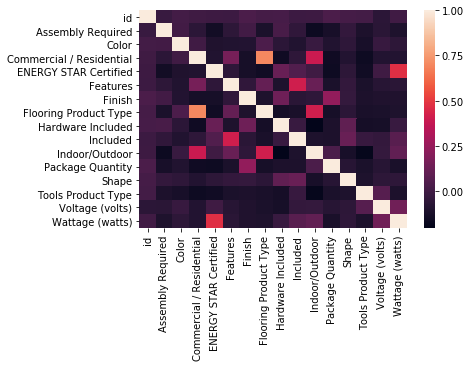

In [29]:
sns.heatmap(data.corr())

#### This shows the correclation of the label with each other

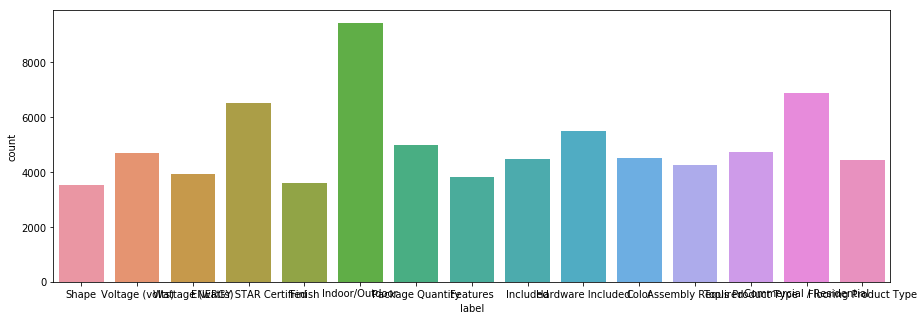

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,5
sns.countplot(d2.label)

### this shows distributuion of labels among the data